This notebook is to test out the different meteorogical data querying, but also my imagination on how to get myself killed.

# Wunderground API






The first one, and the one I thought could be used by us is this one from

http://oco-carbon.com/coding/wunderground-data-to-csv/

In [1]:
import csv
import datetime
import os
import requests # this library makes html requests much simpler
import json

In [ ]:
#Adding the required info

# add your API key (from wunderground) here
api_key = "1e35c91c4bb74f61b5c91c4bb7ff617d"
station_ids = ["KJFK","KSFO"] # add more stations here if required

In [ ]:
#Now we do create the csv file

for station_id in station_ids:
	print("Fetching data for station ID: %s" % station_id)
	try:
		# initialise your csv file
		with open('%s.csv' % station_id, 'w', newline = '') as outfile:
			writer = csv.writer(outfile, delimiter=',', quoting=csv.QUOTE_MINIMAL)
			headers = ['date','Dry-Bulb Temperature','Atmospheric Pressure','Dew-Point Temperature','Relative Humidity','wind speed','wind direction','Precip','Visibility','Solar Condition'] # edit these as required
			units = ['','C','hpa','C','%','km/h','Degrees','mm','km','']
			keys = ['tempm','pressurem','dewptm','hum','wspdm','wdird','precipm','vism','conds']
			writer.writerow(headers)
			writer.writerow(units)

			# enter the first and last day required here
			start_date = datetime.date(2019,1,1)
			end_date = datetime.date(2019,1,31)

			date = start_date
			while date <= end_date:
                            # format the date as YYYYMMDD
                            date_string = date.strftime('%Y%m%d')
                            # build the url
                            url = ("http://api.wunderground.com/api/%s/history_%s/q/%s.json" %(api_key, date_string, station_id))
                            # make the request and parse json
                            data = requests.get(url).json() ###this is where the program stops working
                            # print(data)
                            # build your row
                            for history in data['history']['observations']:
                                row = []
                                row.append(str(history['date']['pretty']))
                                for k in keys:
                                    row.append(str(history[k]))
                                writer.writerow(row)
                            # increment the day by one
                            date += datetime.timedelta(days=1)
	except Exception:
		# tidy up
		os.remove(outfile)

print("Done!")

Fetching data for station ID: KJFK


TypeError: ignored

It was fairly easy to understand, and that's why I spent quite a lot of hours trying to fix something that wouldnt work. After few Google search, I found out that from 2019 Weather Underground changed their API policies, and the requests to historical data throught their API is denied, unless it is your own PWS (personal weahter station).

In [ ]:
#trying out something different
#!pip install WunderWeather
#import WunderWeather as wunder

In [ ]:
#Now we try to get the data
#from WunderWeather import weather
#extractor = weather.Extract(api_key)
#[location,current] = extractor.features("MA/Boston",(('geolookup',''),('now','')))
#print("Current Temperature in %s is: %s" %(location.data.city,current.temp_f))

##THIS DOES NOT WORK

The thing of looking at old pieces of scripts, that you might find that whatever they were using is not online anymore.

In [ ]:
print(url)

http://api.wunderground.com/api/1e35c91c4bb74f61b5c91c4bb7ff617d/history_20190101/q/KJFK.json


Testing different url with the v2 API, it seems that the historical data is restricted, as we get denied access.

In [ ]:
 #https://api.weather.com/v2/pws/observations/current?stationId=KJFK&format=json&units=e&apiKey=1e35c91c4bb74f61b5c91c4bb7ff617d

In [ ]:
#https://api.weather.com/v2/pws/observations/history_20190101?stationId=KCTWESTH45&format=json&units=e&apiKey=6532d6454b8aa370768e63d6ba5a832e

This API is using JAVA, and I dont know how could we translate that to python

In [ ]:
#curl --header "x-api-key: {key}" "https://api.meteostat.net/v2/stations/meta?id=10637"

This in theory could provide us with different weather historical data for free, although it seems that we need to provide it with loc and lat data, as I cant code in Java, I will just use the python library; please see below.

# Meteostat library

It is a library in python which allows us to fetch historical data, either way in hourly or daily basis of almost all airports in the worl. It is quite important to remark that this API is mostly focused on historical data, which for us makes sense.

In [3]:
!pip install meteostat

  Created wheel for meteostat: filename=meteostat-1.2.2-py3-none-any.whl size=15695 sha256=71cad4d7b0cfb840525f2e5b6c7c4e1eed9f8627ae58f6029fab2bce0b91d4d7
  Stored in directory: c:\users\ivorr\appdata\local\pip\cache\wheels\80\59\70\e944ab08ebc5fd1a2439be28a4befa4d40eaf3d8c9e567ba47
Successfully built meteostat


In [4]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2019, 1, 1)
end = datetime(2019, 1, 31)

# Create Point for JFK International Airport
JFK = Point(40.639722, -73.778889, 70)

# Get daily data for 2018
data = Daily(JFK, start, end)
data = data.fetch()

In [5]:
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2019-01-01,10.0,4.3,14.1,2.4,0.0,280.0,24.1,NaN,1010.8,NaN
2019-01-02,3.2,1.2,4.7,0.0,0.0,44.6,11.7,NaN,1024.8,NaN
2019-01-03,4.7,0.7,7.1,0.0,0.0,276.0,14.7,NaN,1014.8,NaN
2019-01-04,3.1,-0.4,7.0,0.0,0.0,227.2,14.7,NaN,1014.4,NaN
2019-01-05,6.4,4.8,7.6,13.1,0.0,19.9,17.0,NaN,1001.2,NaN
2019-01-06,6.1,-0.5,10.1,0.0,0.0,296.6,23.2,NaN,1014.2,NaN
2019-01-07,-1.1,-3.9,1.1,0.0,0.0,8.6,14.9,NaN,1030.1,NaN
2019-01-08,3.1,0.9,6.8,4.0,0.0,176.3,7.8,NaN,1014.7,NaN
2019-01-09,5.5,0.9,7.5,1.4,0.0,283.6,28.0,NaN,1002.0,NaN


In [7]:
data.loc["2019-01-01"]

tavg      10.0
tmin       4.3
tmax      14.1
prcp       2.4
snow       0.0
wdir     280.0
wspd      24.1
wpgt       NaN
pres    1010.8
tsun       NaN
Name: 2019-01-01 00:00:00, dtype: float64

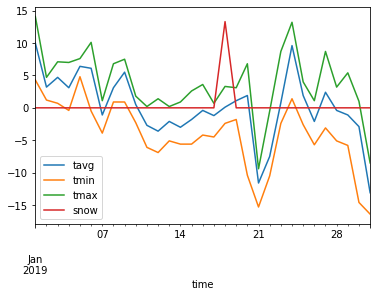

In [8]:
# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax', 'snow']) #this can be extended from here https://dev.meteostat.net/docs/formats.html#meteorological-parameters
plt.show()

In [9]:
#It is daily data and not hourly
data.head()
#Also it is important to say that weather conditions codes are not accessible!

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2019-01-01,10.0,4.3,14.1,2.4,0.0,280.0,24.1,NaN,1010.8,NaN
2019-01-02,3.2,1.2,4.7,0.0,0.0,44.6,11.7,NaN,1024.8,NaN
2019-01-03,4.7,0.7,7.1,0.0,0.0,276.0,14.7,NaN,1014.8,NaN
2019-01-04,3.1,-0.4,7.0,0.0,0.0,227.2,14.7,NaN,1014.4,NaN
2019-01-05,6.4,4.8,7.6,13.1,0.0,19.9,17.0,NaN,1001.2,NaN


In [10]:
#Nevermind, actually you can get the hourly as well as the weather conditions codes
# Import Meteostat library and dependencies
from meteostat import Hourly

# Set time period
start = datetime(2019, 1, 1)
end = datetime(2019, 1, 31, 23, 59)

# Get hourly data
data = Hourly(JFK, start, end)
data = data.fetch()

# Print DataFrame
print(data)

                     temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt    pres  \
time                                                                           
2019-01-01 00:00:00   6.3   5.9  97.8   2.0   NaN  120.0  15.1   NaN  1020.3   
2019-01-01 01:00:00   6.3   5.9  97.5   4.6   NaN  120.0  22.4   NaN  1018.4   
2019-01-01 02:00:00   6.5   6.5  99.5   4.4   NaN  120.0  18.0   NaN  1016.5   
2019-01-01 03:00:00   6.8   6.5  98.1   5.6   NaN  100.0  17.5   NaN  1014.0   
2019-01-01 04:00:00   7.1   7.0  99.3   4.1   NaN  110.0  14.2   NaN  1011.7   
...                   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2019-01-31 19:00:00  -9.1 -22.5  33.5   0.0   NaN  270.0  24.3   NaN  1027.9   
2019-01-31 20:00:00  -9.0 -22.1  34.2   0.0   NaN  270.0  26.9   NaN  1027.6   
2019-01-31 21:00:00  -9.0 -21.8  35.3   0.0   NaN  250.0  27.5   NaN  1028.0   
2019-01-31 22:00:00  -9.3 -22.1  35.2   0.0   NaN  250.0  25.1   NaN  1028.1   
2019-01-31 23:00:00 -10.0 -21.8  38.1   

In [13]:
#We can import stations using ICAO codes, and the full list of such stations can be found in this JSON https://bulk.meteostat.net/v2/stations/lite.json.gz
from meteostat import Stations

#To get the ID we can use string, tuples and/or lists
#We could get from the JSON file all US ICAO codes we need (at least in theory)
stations = Stations()
airports = stations.id('icao',['KSFO','KJFK']).fetch()

print(airports)

                          name country region    wmo  icao  latitude  \
id                                                                     
72494    San Francisco Airport      US     CA  72494  KSFO   37.6167   
74486  John F. Kennedy Airport      US     NY  74486  KJFK   40.6333   

       longitude  elevation             timezone hourly_start hourly_end  \
id                                                                         
72494  -122.3667        3.0  America/Los_Angeles   1973-01-01 2021-05-11   
74486   -73.7667        4.0     America/New_York   1973-01-01 2021-05-11   

      daily_start daily_end  
id                           
72494  1945-07-01       NaT  
74486  1948-07-17       NaT  


In [14]:
data = Hourly(airports, start, end)
data = data.fetch()
print(data)

                             temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt  \
station time                                                                   
72494   2019-01-01 00:00:00  12.2  -1.7  38.0   0.0   NaN  350.0  29.5   NaN   
        2019-01-01 01:00:00  12.2  -0.7  41.0   0.0   NaN  350.0  31.7   NaN   
        2019-01-01 02:00:00  12.2   0.0  43.0   0.0   NaN  350.0  35.3   NaN   
        2019-01-01 03:00:00  11.7  -1.1  41.0   0.0   NaN  350.0  46.4   NaN   
        2019-01-01 04:00:00  11.7  -0.5  43.0   0.0   NaN  360.0  44.6   NaN   
...                           ...   ...   ...   ...   ...    ...   ...   ...   
74486   2019-01-31 19:00:00  -8.9 -22.3  33.0   0.0   NaN  270.0  25.9   NaN   
        2019-01-31 20:00:00  -8.9 -21.6  35.0   0.0   NaN  270.0  29.5   NaN   
        2019-01-31 21:00:00  -8.9 -21.0  37.0   0.0   NaN  250.0  31.7   NaN   
        2019-01-31 22:00:00  -9.4 -21.1  38.0   0.0   NaN  250.0  25.9   NaN   
        2019-01-31 23:00:00  -9.4 -21.1 

In [19]:
import pandas as pd
#Check there are no null values for any Indicator
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = round(percent_1,1).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data[missing_data['Total']!=0]

,Total,%
tsun,1488,100.0
wpgt,1488,100.0
snow,1488,100.0


I know, it is dumb, but instead of using the ICAO code, it uses the internal meteosat codes, nonetheless we get a fairly nice DF.

# NCEI API

Another possible solution could be to use the NCEI API, I would say it is the most reliable, although it is a bit tricky as we need to input the station codes of our places of interest, meaning that we would need to look up for the weather stations id of each airport we need to study.



More information can be found here:

https://towardsdatascience.com/getting-weather-data-in-3-easy-steps-8dc10cc5c859

https://www.ncei.noaa.gov/support/access-data-service-api-user-documentation